In [1]:
%matplotlib inline
import numpy as np, pandas as pd, scipy as sp
from matplotlib import pyplot as plt
from numpy.random import random # import only one function
from numpy.random import randint
import matplotlib.cm as cm

In [2]:
size = 3
T = 2.5

In [3]:
state = random([size,size])
state[state<=0.5] = -1
state[state>0.5] = 1
print (state)

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [-1. -1. -1.]]


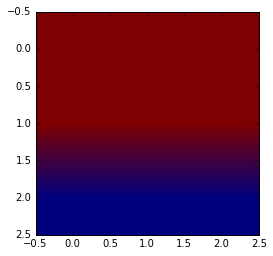

In [4]:
plt.imshow(state)

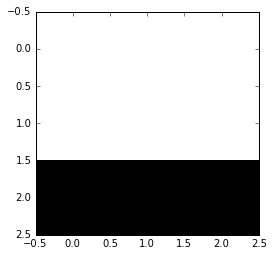

In [5]:
plt.imshow(state,interpolation='nearest',cmap=cm.Greys_r)

In [97]:
def energy_one(s,i,j):
    from numpy import mod
    above = s[mod(i+1,size),j]
    below = s[mod(i-1,size),j]
    right = s[i,mod(j+1,size)]
    left =  s[i,mod(j-1,size)]
    return -s[i,j]*(above+below+left+right)

In [99]:
print (energy_one(state,1,0))

-2.0


In [13]:
state

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [-1., -1., -1.]])

In [14]:
def energy(state):
    total = 0
    for i in range(size):
        for j in range(size):
            total = total + energy_one(state,i,j)
    return total

In [15]:
print (energy(state))

-12.0


And, at this point, we should discuss the pseudocode and you should use [Schroeder's Model on the web](http://physics.weber.edu/schroeder/software/demos/IsingModel.html)

What's next?
0. Pick a random state (done)
1. Consider a move:
    1. Flip one to the other sign
    2. If $\Delta U <= 0$, accept
    3. If $\Delta U > 0$, accept with boltzman probability

Choose random row, random column to flip

In [37]:
randint(3)

1

reject
accept
reject
reject
reject
reject
reject
reject
reject
reject


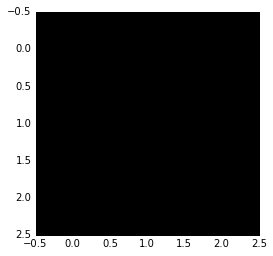

In [44]:
ntrials = 10
for ntrial in range(ntrials):
    i,j = randint(size),randint(size)
    U = energy(state)
    trialstate = state.copy()
    trialstate[i,j] = trialstate[i,j]*(-1)
    trialU = energy(trialstate)
    deltaU = trialU-U
    if deltaU <= 0:
        state = trialstate
        print("accept")
    else:
        if random() < np.exp(-deltaU/T):
            state = trialstate
            print("accept")
        else:
            state = state
            print("reject")
plt.imshow(state,interpolation='nearest',cmap=cm.Greys_r)

In [45]:
from ipywidgets import interact

In [68]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

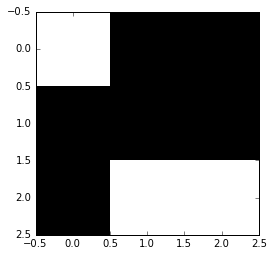

In [86]:
state = random([size,size])
state[state<=0.5] = -1
state[state>0.5] = 1
plt.imshow(state,interpolation='nearest',cmap=cm.Greys_r)

-2.0

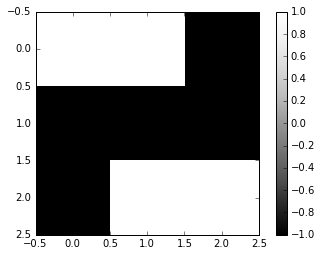

In [100]:
plt.imshow(state,interpolation='nearest',cmap=cm.Greys_r)
plt.colorbar()
energy_one(state,1,0)

[[  0. -16.   0.]
 [  0.   0. -16.]
 [-16.   0.   0.]]


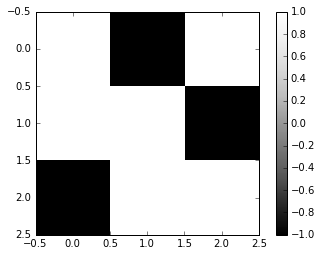

In [106]:
state = random([size,size])
state[state<=0.5] = -1
state[state>0.5] = 1

plt.imshow(state,interpolation='nearest',cmap=cm.Greys_r)
plt.colorbar()

deltaUs = np.zeros_like(state)
for i in range(size):
    for j in range(size):

        U = energy(state)
        trialstate = state.copy()
        trialstate[i,j] = trialstate[i,j]*(-1)
        trialU = energy(trialstate)
        deltaU = trialU-U
        deltaUs[i,j] = deltaU
print(deltaUs)

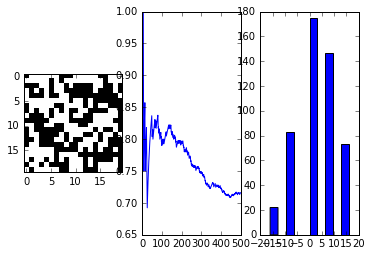

In [110]:
T=3
size = 20
state = random([size,size])
state[state<=0.5] = -1
state[state>0.5] = 1

acceptances = [0]
deltaUs = []
def nextstate(trial=0,T=10):
    global state
    for banana in range(100):
        i,j = randint(size),randint(size)
        U = energy(state)
        trialstate = state.copy()
        trialstate[i,j] = trialstate[i,j]*(-1)
        trialU = energy(trialstate)
        deltaU = trialU-U
        deltaUs.append(deltaU)
        if deltaU <= 0:
            state = trialstate
            acceptances.append(acceptances[-1]+1)
        else:
            if random() < np.exp(-deltaU/T):
                state = trialstate
                acceptances.append(acceptances[-1]+1)
            else:
                state = state
                acceptances.append(acceptances[-1])
    plt.subplot(1,3,1)
    plt.imshow(state,interpolation='nearest',cmap=cm.Greys_r)
    plt.subplot(1,3,2)
    #plt.axes((0,100,0,100))
    plt.plot(np.array(acceptances)/np.arange(len(acceptances)))
    plt.subplot(1,3,3)
    plt.hist(deltaUs)
    #plt.plot(acceptances)
interact(nextstate,trial=(0,1000),T=(2,10,0.1))

(0.0, 1.0, 0.0, 1.0)

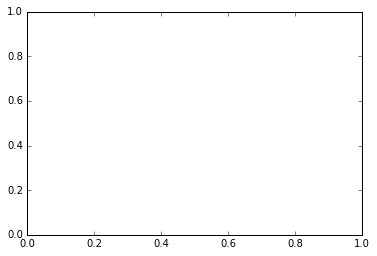

In [65]:
plt.axis()